## Mapping human gait using unsupervised AI
This notebook demonstrates how to use the `gait_mapper` package to train a variational autoencoder for mapping human gait.

In [11]:
import numpy as np
import gait_mapper
import gait_mapper.vae
from pathlib import Path

# plotting
import matplotlib.pyplot as plt

## 1 - Create the variational autoencoder
Call the `vae` module from `gait_mapper` and create the encoder and decoder network.

In [2]:
# define parameters for the model
window_length = 200
degree_of_freedom = 6
latent_features = 2

vae = gait_mapper.vae.VAE(window_length, degree_of_freedom, latent_features)

2022-04-26 15:52:26.788186: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-26 15:52:26.788338: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-26 15:52:26.788393: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (NLeSC0068): /proc/driver/nvidia/version does not exist
2022-04-26 15:52:26.789310: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# overview of encoder network
vae.encoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 6)]     0           []                               
                                                                                                  
 conv1 (Conv1D)                 (None, 196, 64)      1984        ['input_1[0][0]']                
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 98, 64)       0           ['conv1[0][0]']                  
                                                                                                  
 conv2 (Conv1D)                 (None, 96, 64)       12352       ['max_pooling1d[0][0]']          
                                                                                              

In [4]:
# overview of decoder network
vae.decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 64)                192       
                                                                 
 reshape (Reshape)           (None, 1, 64)             0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 3, 16)            3088      
 nspose)                                                         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 7, 32)            2592      
 ranspose)                                                       
                                                                 
 up_sampling1d (UpSampling1D  (None, 35, 32)           0   

## 2 - Loading the dataset

In [5]:
# get the test data
repo_path = Path().resolve().parent
data_folder = Path(repo_path, 'tests/test_data')
# prepare data for the network
raw_data = np.load(Path(data_folder,
 "stored_groupsplit_withoutS01722_latentfeatures_2_frequency_20.npy"))
data = raw_data[:4800].reshape(-1, window_length, degree_of_freedom)

In [6]:
print(data.shape)

(4, 200, 6)


## 3 - Train model

In [7]:
# choose the optimizer
vae.compile(optimizer="adam")
# train the model
history = vae.fit(data, epochs=500, batch_size=4)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 2327645.7500 - reconstruction_loss: 1383.2115 - kl_loss: 2326262.5000
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 1651.6189 - reconstruction_loss: 1615.0859 - kl_loss: 36.5329
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 1658.6456 - reconstruction_loss: 1623.1447 - kl_loss: 35.5009
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 1669.9380 - reconstruction_loss: 1614.2708 - kl_loss: 55.6672
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 1676.1927 - reconstruction_loss: 1604.3000 - kl_loss: 71.8927
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 1674.5986 - reconstruction_loss: 1594.0474 - kl_loss: 80.5512
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 1667.7866 - reconstruction_loss: 1583.1090 - kl_loss: 84.6776
Epoch 8/500
1/1 [==============================] - 0s 9ms/s

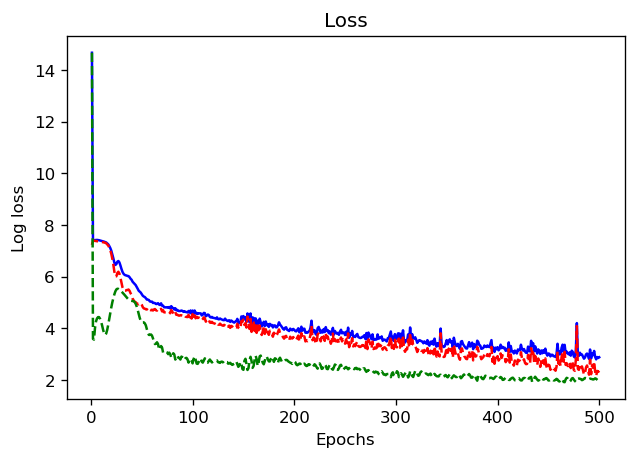

In [15]:
# plot the loss
epochs = len(history.history['loss'])

fig = plt.figure(dpi=120)
plt.plot(range(1, epochs+1, 1), np.log(history.history['loss']),
 color='b', label='loss')
plt.plot(range(1, epochs+1, 1), np.log(history.history['reconstruction_loss']),
 color='r', ls='--', label='reconstruction loss')
plt.plot(range(1, epochs+1, 1), np.log(history.history['kl_loss']),
 color='g', ls='--', label='kl loss')
plt.xlabel('Epochs')
plt.ylabel('Log loss')
plt.title('Loss')
plt.legend()
plt.show()

In [9]:
len(history.history['reconstruction_loss'])

500